<a href="https://colab.research.google.com/github/Tkag0001/Practice-ML-with-Digit-recognize-problem/blob/main/Train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem: Recognizing handwritten digits
Data resources: https://www.kaggle.com/c/digit-recognizer

#Connect to drive:

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#Import packages:

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#Loading the dataset:


unzip data

In [ ]:
!unzip '/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/digit-recognizer.zip' -d '/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data'

Archive:  /content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/digit-recognizer.zip
  inflating: /content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/sample_submission.csv  
  inflating: /content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/test.csv  
  inflating: /content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/train.csv  


In [3]:
train = pd.read_csv('/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/test.csv')

In [ ]:
print(f"train size: {train.shape}")
print(f"test size: {test.shape}")

train size: (42000, 785)
test size: (28000, 784)


#Visualize data

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train = train['label']
X_train = train.drop(labels=['label'],axis = 1)

In [ ]:
y_train.columns = ['label']
print(y_train)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


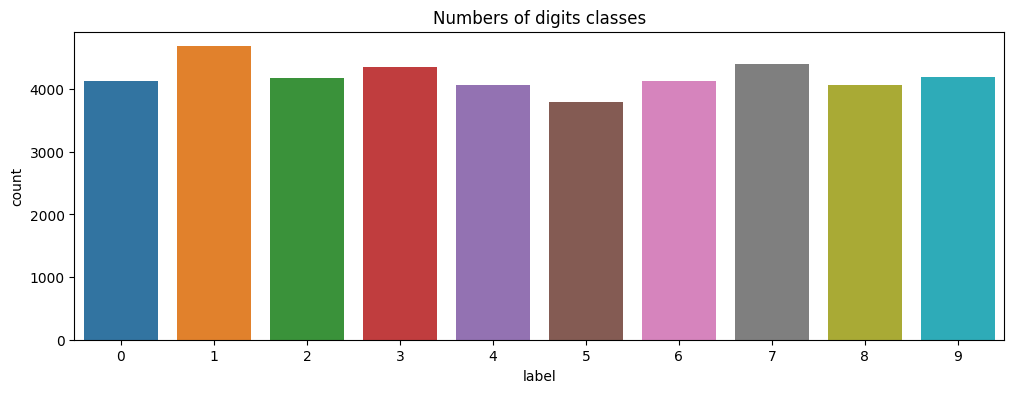

In [ ]:
plt.figure(figsize=(12,4))
g = sns.countplot(x=y_train)
plt.title("Numbers of digits classes")
print(y_train.value_counts())
plt.show()